<a href="https://colab.research.google.com/github/sada95/Memoire_Master/blob/main/Copie_de_Exercice_Fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
print("You are using TensorFlow version", tf.__version__)
if len(tf.config.list_physical_devices('GPU')) > 0:
  print("You have a GPU enabled.")
else:
  print("Enable a GPU before running this notebook.")

You are using TensorFlow version 2.4.1
Enable a GPU before running this notebook.


In [ ]:
# In this notebook, we'll use Keras: TensorFlow's user-friendly API to 
# define neural networks. Let's import Keras now.
from tensorflow import keras
import matplotlib.pyplot as plt

In [ ]:
dataset = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = dataset.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [ ]:
print(train_images.shape)

(60000, 28, 28)


In [ ]:
print(test_images.shape)

(10000, 28, 28)


In [ ]:
print(train_labels)

[9 0 0 ... 3 0 5]


In [ ]:
train_images = train_images / 255.0
test_images = test_images / 255.0

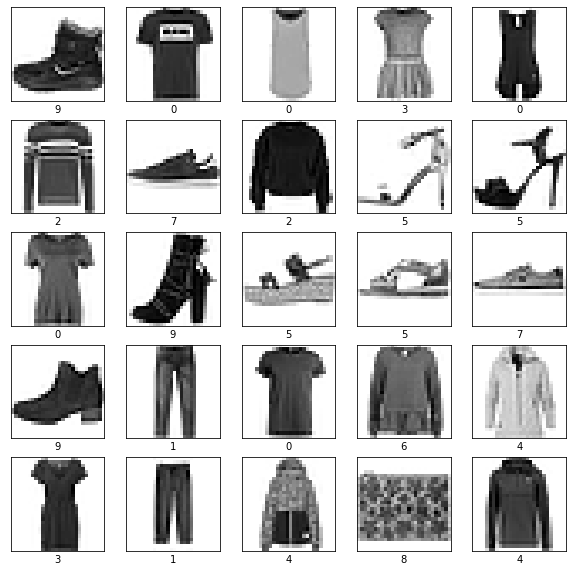

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(train_labels[i])
plt.show()

In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
EPOCHS=15
model.fit(train_images, train_labels, 
                    validation_data=(test_images, test_labels),
                    epochs=EPOCHS)

Epoch 1/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1398 - accuracy: 0.9480 - val_loss: 0.4132 - val_accuracy: 0.8841
Epoch 2/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1382 - accuracy: 0.9478 - val_loss: 0.4161 - val_accuracy: 0.8826
Epoch 3/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1354 - accuracy: 0.9484 - val_loss: 0.4167 - val_accuracy: 0.8865
Epoch 4/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1310 - accuracy: 0.9499 - val_loss: 0.4398 - val_accuracy: 0.8840
Epoch 5/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1297 - accuracy: 0.9510 - val_loss: 0.4084 - val_accuracy: 0.8874
Epoch 6/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1262 - accuracy: 0.9523 - val_loss: 0.4376 - val_accuracy: 0.8874
Epoch 7/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1237 - accuracy: 0.9520 - val_loss: 0.4426 - val_accuracy:

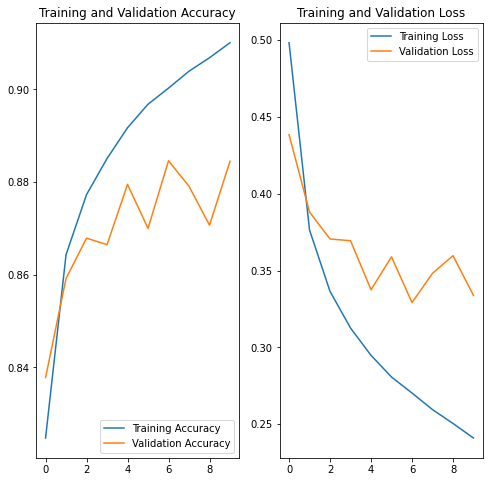

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
 
loss = history.history['loss']
val_loss = history.history['val_loss']
 
epochs_range = range(EPOCHS)
 
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
 
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()